https://www.kaggle.com/karanjakhar/facial-keypoint-detection

###Imports, Mount Drive

In [0]:
# I took this kaggle challenge and ran it.
#https://www.kaggle.com/karanjakhar/facial-keypoint-detection

import pandas as pd
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
import random
import torch

In [0]:
# Dont forget to mount drive! We have our data in our google drive, I downloaded the data from kaggle.
drive.mount('/content/drive/', force_remount=False)

In [0]:
# linux system commands
%cd '/content/drive/My Drive/Applied 2020.06.06/Week 1 Materials'
!ls

###Data Examination

In [0]:
# If data is zipped, perform this to unzip
#!unzip training.zip
#!ls

In [0]:
# If there are blank cells in the data, fill them with the values in previous row
data = pd.read_csv('training.csv') 
print(data.head())
print(data.isnull().any().value_counts())
data.fillna(method = 'ffill',inplace = True)
print(data.isnull().any().value_counts())

In [0]:
# I will use the last 49 images to make visualizations, I consider that a part of our testing process
# For getting metrics like accuracy, or getting average loss, 49 examples is not enough. You need more examples for that
# and also, cross validation would be good for getting your metric results
datalen = 7049
trainlen = 7000

Training

In [0]:
# Image data is written in a column in the csv file,
# here we pull each row of pixels from it, then each pixel
# then we make it a list of pixels in "pixel" variable
# then we append that list, that image, to our dataset inputs variable "pixel_list"
pixel_list = []
for i in range(0,datalen):
    row = data['Image'][i].split(' ')
    pixel = ['0' if x == '' else x for x in row]
    pixel_list.append(pixel)

In [0]:
input_tensor = np.array(pixel_list,dtype = 'float')
print(np.shape(input_tensor))
input_tensor = input_tensor.reshape(-1,96,96,1)
print(np.shape(input_tensor))

(7049, 9216)
(7049, 96, 96, 1)


In [0]:
# drop image column from csv file, since labels do not include inputs
labels = data.drop('Image',axis = 1)

# get all columns for each row, append to the dataset labels variable "label_list"
label_list = []
for i in range(0,datalen):
    label = labels.iloc[i,:]
    label_list.append(label)
label_tensor = np.array(label_list,dtype = 'float')

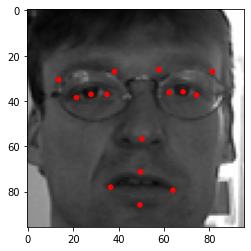

In [0]:
from matplotlib.pyplot import Circle

index = random.randint(0,1000)

fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(input_tensor[index].reshape(96,96),cmap='gray')

for xx, yy in label_tensor[index].reshape((15,2)):
    circ = Circle((xx,yy),1,color='red')
    ax.add_patch(circ)

### Network

In [0]:
from keras.layers.advanced_activations import LeakyReLU
from keras.models import Sequential, Model
from keras.layers import Activation, Convolution2D, MaxPooling2D, BatchNormalization, Flatten, Dense, Dropout, Conv2D,MaxPool2D, ZeroPadding2D

Using TensorFlow backend.


In [0]:
model = Sequential()

# this is a deep network. shorter networks might work too
model.add(Convolution2D(32, (3,3), padding='same', use_bias=False, input_shape=(96,96,1)))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(32, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(64, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(96, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(BatchNormalization())
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(128, (3,3),padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(256, (3,3),padding='same',use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())

model.add(Convolution2D(512, (3,3), padding='same', use_bias=False))
model.add(LeakyReLU(alpha = 0.1))
model.add(BatchNormalization())


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(30))
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_25 (Conv2D)           (None, 96, 96, 32)        288       
_________________________________________________________________
leaky_re_lu_25 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_26 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_26 (Conv2D)           (None, 96, 96, 32)        9216      
_________________________________________________________________
leaky_re_lu_26 (LeakyReLU)   (None, 96, 96, 32)        0         
_________________________________________________________________
batch_normalization_27 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 48, 48, 32)       

In [0]:
model.compile(optimizer='adam', 
              loss='mean_squared_error',
              metrics=['mae'])

In [0]:
model.fit(input_tensor,label_tensor,epochs = 50,batch_size = 256,validation_split = 0.2)


Train on 5639 samples, validate on 1410 samples
Epoch 1/50
5639/5639 [==============================] - 20s 3ms/step - loss: 335.7532 - mae: 11.8549 - val_loss: 609.6303 - val_mae: 22.6946
Epoch 2/50
5639/5639 [==============================] - 16s 3ms/step - loss: 32.3184 - mae: 4.4292 - val_loss: 183.3304 - val_mae: 12.4833
Epoch 3/50
5639/5639 [==============================] - 16s 3ms/step - loss: 26.3277 - mae: 3.9556 - val_loss: 107.5867 - val_mae: 9.3939
Epoch 4/50
5639/5639 [==============================] - 16s 3ms/step - loss: 23.9336 - mae: 3.7622 - val_loss: 89.1855 - val_mae: 8.5844
Epoch 5/50
5639/5639 [==============================] - 16s 3ms/step - loss: 22.2896 - mae: 3.6157 - val_loss: 52.5769 - val_mae: 6.4792
Epoch 6/50
5639/5639 [==============================] - 16s 3ms/step - loss: 20.6168 - mae: 3.4681 - val_loss: 42.4097 - val_mae: 5.6328
Epoch 7/50
5639/5639 [==============================] - 16s 3ms/step - loss: 19.1081 - mae: 3.3277 - val_loss: 42.7002 - va

KeyboardInterrupt: ignored

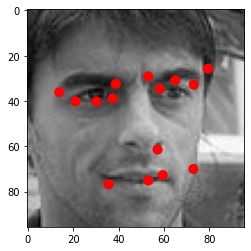

In [0]:
# visualize a prediction
from matplotlib.pyplot import Circle
a = 50
randomsayi = random.randint(0,a-1)


preds = model.predict(input_tensor[-a:])


fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(input_tensor[7000+randomsayi].reshape((96,96)),cmap = 'gray')

for xx, yy in preds[randomsayi].reshape((15,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)


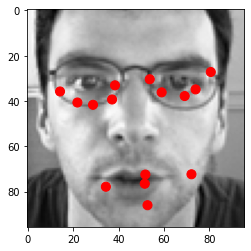

In [0]:
#visualize another prediction to check if model always predicts the same points
from matplotlib.pyplot import Circle
a = 50
randomsayi = random.randint(0,a-1)


preds = model.predict(input_tensor[-a:])


fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(input_tensor[randomsayi].reshape((96,96)),cmap = 'gray')

for xx, yy in preds[randomsayi].reshape((15,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)


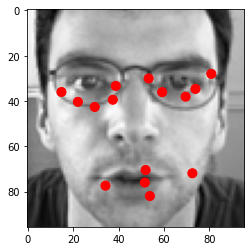

In [0]:
#visualize the labels of the input of the second prediction
from matplotlib.pyplot import Circle




preds = model.predict(input_tensor[-a:])


fig, ax = plt.subplots(1)
ax.set_aspect('equal')

ax.imshow(input_tensor[6999+randomsayi].reshape((96,96)),cmap = 'gray')

for xx, yy in label_tensor[-a:][randomsayi].reshape((15,2)):
    circ = Circle((xx,yy),2,color='red')
    ax.add_patch(circ)
